In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#Abro el csv
df_zonap = pd.read_csv('../Archivos CSV/trainTP12019.csv'
            ,dtype={
             "id":np.int32
            ,"titulo":'category'
            ,"fecha":str 
            ,"ciudad": 'category'
            ,"provincia": 'category'
            ,"tipodepropiedad": 'category' })

df_zonap.head(3)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0


In [3]:
#Cambio la fecha a Datatime
df_zonap['fecha'] = pd.to_datetime(df_zonap['fecha'])

# Analisis Exploratorio General



In [4]:
#Tamaño
df_zonap.shape

(240000, 23)

In [5]:
#Informacion General
df_zonap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int32
titulo                        234613 non-null category
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null category
provincia                     239845 non-null category
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                    

In [6]:
#Elementos nulos en cada columna
nulls = pd.DataFrame( df_zonap.isna().sum().sort_values(ascending=False) , columns=['Nulls'] )
nulls['%porcentaje'] = round(100*nulls['Nulls'] / len(df_zonap), 2)
nulls

,Nulls,%porcentaje
lng,123488,51.45
lat,123488,51.45
direccion,53072,22.11
metrostotales,51467,21.44
antiguedad,43555,18.15
garages,37765,15.74
idzona,28621,11.93
banos,26221,10.93
habitaciones,22471,9.36
metroscubiertos,17400,7.25


In [7]:
#Descricion general
df_zonap.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [8]:
#Descricion general
df_zonap.describe( include = 'all')

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,234613,238381,239954,186928,239628,239845,196445.000000,217529.000000,202235.000000,...,2.113790e+05,116512.000000,116512.000000,240000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
unique,NaN,186191,232187,24,140269,875,32,NaN,NaN,NaN,...,NaN,NaN,NaN,1830,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,casa en venta,empresa dedicada a los ante notario y regist...,Casa,-,Querétaro,Distrito Federal,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,468,119,141717,660,12646,58790,NaN,NaN,NaN,...,NaN,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,149969.382092,NaN,NaN,NaN,NaN,NaN,NaN,8.116114,2.902326,1.546874,...,2.423468e+06,20.696818,-99.509221,NaN,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,NaN,NaN,NaN,NaN,NaN,NaN,9.553830,0.896894,0.853507,...,1.056794e+07,3.137884,9.744143,NaN,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,...,2.200000e+01,-100.886679,-125.859375,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,1.000000,...,2.489000e+04,19.359846,-100.977908,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05


# 1- Columna 'id'
Un id numérico para identificar la propiedad

In [9]:
ids = df_zonap['id']

In [10]:
print( 'El minimo es :', ids.min() )
print( 'El maximo es :', ids.max() )

El minimo es : 1
El maximo es : 299999


# 2- Columna 'titulo'
El título de la propiedad publicada


In [11]:
titulo = df_zonap['titulo']
titulo.value_counts().sort_values( ascending= False )

casa en venta                                                               468
departamento en venta                                                       289
casa en venta en chihuahua                                                  268
casa en venta en querétaro                                                  238
departamento en venta en benito juárez                                      221
                                                                           ... 
isola departamento con excelentes vistas al mar y canales marinos             1
isla de cuautla                                                               1
hermosa casa en venta en el refugio, habitación completa en plana baja!       1
hermosa casa en venta en infonavit humaya.                                    1
casa en venta en barrio de arboledas                                          1
Name: titulo, Length: 186191, dtype: int64

In [12]:
print('Cantidad de No nulos:',titulo.count() )
print('Cantidad de elementos unicos:',titulo.nunique() )
print('Cantidad de Nulos:',titulo.isna().sum() )
print('Cantidad total:',len(titulo))

Cantidad de No nulos: 234613
Cantidad de elementos unicos: 186191
Cantidad de Nulos: 5387
Cantidad total: 240000


# 3- Columna 'descripcion'
 La descripción de la propiedad publicada

In [13]:
descripcion = df_zonap['descripcion']
descripcion.value_counts().sort_values( ascending= False )

empresa dedicada a los   ante notario y registro público tiene grandes oportunidades para ti desde un 50-70% debajo de su avalúo, cesiones de derechos con garantia hipotecaria en buenas condiciones en venta únicamente de contado no creditos. si no sabes que es un remate hipotecario no te preocupes nosotros te explicamos. inversión segura, pago de contado. \n\n* las imágenes y descripción aquí presentadas pueden no representar con exactitud la realidad por tener diferencias en relación con la numeración, ubicación y superficies.  (r) no es inmobiliaria sino media derechos crediticios litigiosos y/o adjudicatarios.                                                                                                                                                                                                                                                                                                                                                                                            

In [14]:
print('Cantidad de No nulos:',descripcion.count() )
print('Cantidad de elementos unicos:',descripcion.nunique() )
print('Cantidad de Nulos:',descripcion.isna().sum() )
print('Cantidad total:',len(descripcion))

Cantidad de No nulos: 238381
Cantidad de elementos unicos: 232187
Cantidad de Nulos: 1619
Cantidad total: 240000


# 4- Columna 'tipodepropiedad'
El tipo de propiedad (Casa, departamento, etc)


In [15]:
tipodepropiedad = df_zonap['tipodepropiedad']
tipodepropiedad.value_counts().sort_values( ascending= False )

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [16]:
print('Cantidad de No nulos:',tipodepropiedad.count() )
print('Cantidad de elementos unicos:',tipodepropiedad.nunique() )
print('Cantidad de Nulos:',tipodepropiedad.isna().sum() )
print('Cantidad total:',len(tipodepropiedad))

Cantidad de No nulos: 239954
Cantidad de elementos unicos: 24
Cantidad de Nulos: 46
Cantidad total: 240000


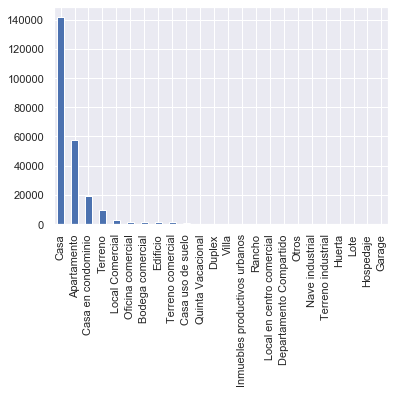

In [17]:
tipodepropiedad.value_counts().plot(kind='bar')

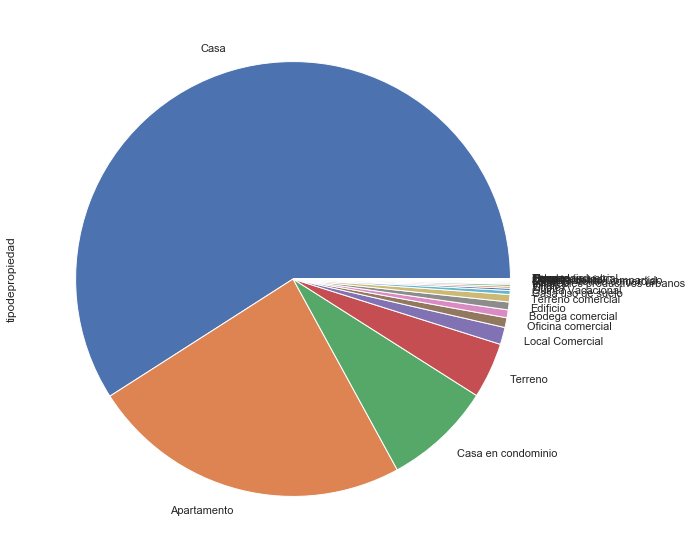

In [18]:
#Grafico Pie - Salio Horrible
tipodepropiedad.value_counts().plot(kind='pie', figsize=(15, 10))

# 5- Columna 'direccion'
La dirección de la propiedad


In [19]:
direcciones = df_zonap['direccion']
direcciones.value_counts().sort_values( ascending= False )

-                                        660
.                                        476
1                                        212
Calle                                    194
Norte de Mérida                          136
                                        ... 
Casa en Brisas la Punta al Sur de MTY      1
Cumbres Oro Residencial                    1
TINIJARO                                   1
Valle del Ebano                            1
Paseo de las Barras 38                     1
Name: direccion, Length: 140269, dtype: int64

In [20]:
print('Cantidad de No nulos:',direcciones.count() )
print('Cantidad de elementos unicos:',direcciones.nunique() )
print('Cantidad de Nulos:',direcciones.isna().sum() )
print('Cantidad total:',len(direcciones))

Cantidad de No nulos: 186928
Cantidad de elementos unicos: 140269
Cantidad de Nulos: 53072
Cantidad total: 240000


# 6- Columna 'ciudad'
 La ciudad de la propiedad

In [21]:
ciudad = df_zonap['ciudad']
ciudad.value_counts().sort_values( ascending= False )

Querétaro          12646
Benito Juárez      11014
Zapopan            10360
San Luis Potosí     7925
Mérida              7162
                   ...  
Yaxcabá                1
Zináparo               1
Reyes Etla             1
Abejones               1
Abalá                  1
Name: ciudad, Length: 875, dtype: int64

In [22]:
print('Cantidad de No nulos:',ciudad.count() )
print('Cantidad de elementos unicos:',ciudad.nunique() )
print('Cantidad de Nulos:',ciudad.isna().sum() )
print('Cantidad total:',len(ciudad))

Cantidad de No nulos: 239628
Cantidad de elementos unicos: 875
Cantidad de Nulos: 372
Cantidad total: 240000


# 7- Columnas 'provincia'
La provincia donde está localizada la propiedad

In [23]:
provincia = df_zonap['provincia']
provincia.value_counts().sort_values( ascending= False )

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [24]:
print('Cantidad de No nulos:',ciudad.count() )
print('Cantidad de elementos unicos:',ciudad.nunique() )
print('Cantidad de Nulos:',ciudad.isna().sum() )
print('Cantidad total:',len(ciudad))

Cantidad de No nulos: 239628
Cantidad de elementos unicos: 875
Cantidad de Nulos: 372
Cantidad total: 240000


# 8- Columna 'antiguedad'
Antigüedad de la propiedad

In [25]:
antiguedad = df_zonap['antiguedad']
antiguedad.value_counts().sort_values( ascending= False )

0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
        ...  
68.0        2
74.0        2
71.0        1
77.0        1
64.0        1
Name: antiguedad, Length: 78, dtype: int64

In [26]:
print('Cantidad de No nulos:',antiguedad.count() )
print('Cantidad de elementos unicos:',antiguedad.nunique() )
print('Cantidad de Nulos:',antiguedad.isna().sum() )
print('Cantidad total:',len(antiguedad))

Cantidad de No nulos: 196445
Cantidad de elementos unicos: 78
Cantidad de Nulos: 43555
Cantidad total: 240000


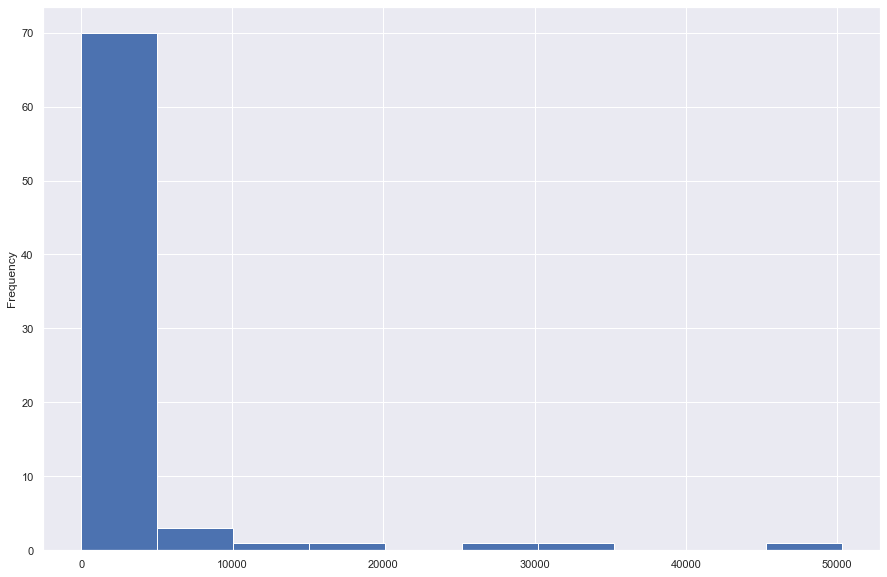

In [27]:
#Histograma
antiguedadPlot = antiguedad.dropna()
antiguedadPlot.value_counts().plot(kind='hist', figsize=(15, 10))

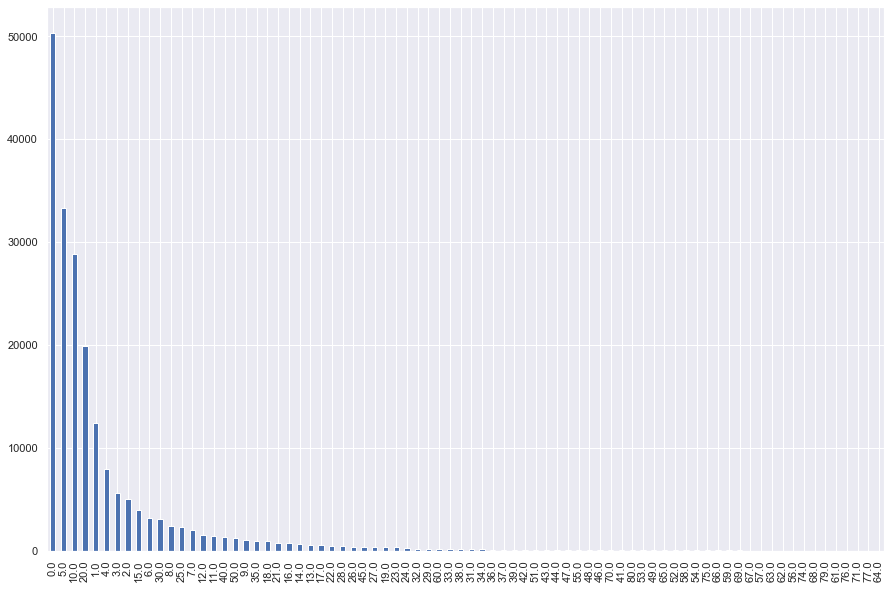

In [28]:
#Grafico de Barras
antiguedadPlot.value_counts().plot(kind='bar', figsize=(15, 10) , style = 'bmh')

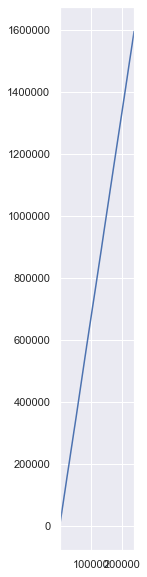

In [29]:
#Grafico de la suma acumulada

#import pylab as p
plt.gca().set_aspect('equal')
#plt.axis('scaled')
#p.axis('equal')

a = antiguedadPlot.cumsum()
a.plot( figsize=(10, 10) )

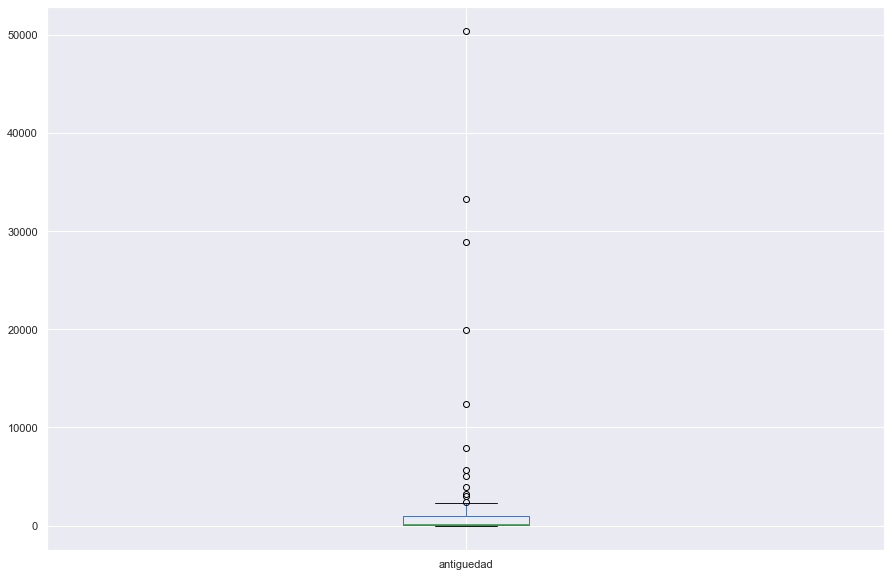

In [30]:
#Grafico de Caja 
antiguedadPlot.value_counts().plot(kind='box' , figsize=(15, 10) )

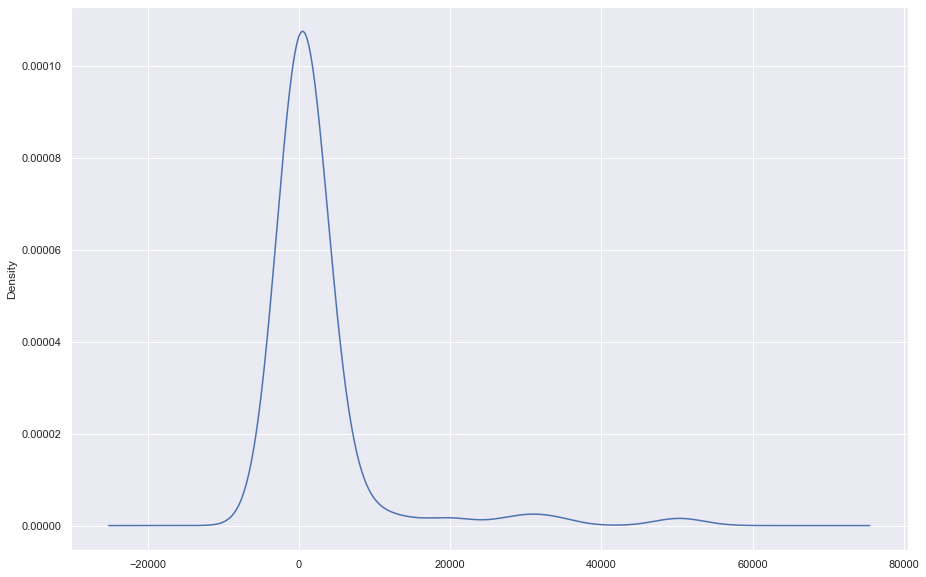

In [31]:
#Grafico de Densidad
antiguedadPlot.value_counts().plot(kind='density', figsize=(15, 10) )

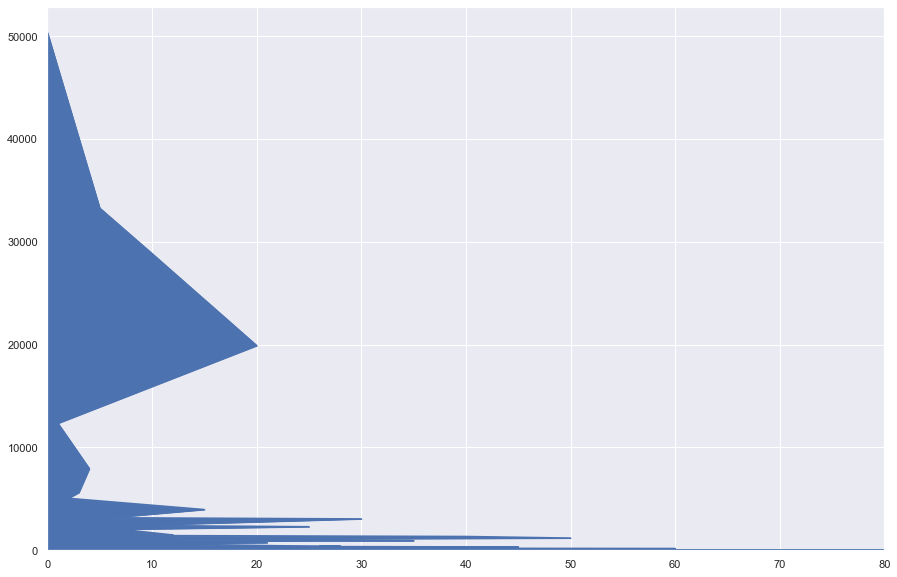

In [32]:
#Grafico de Densidad
antiguedadPlot.value_counts().plot(kind='area', figsize=(15, 10) )

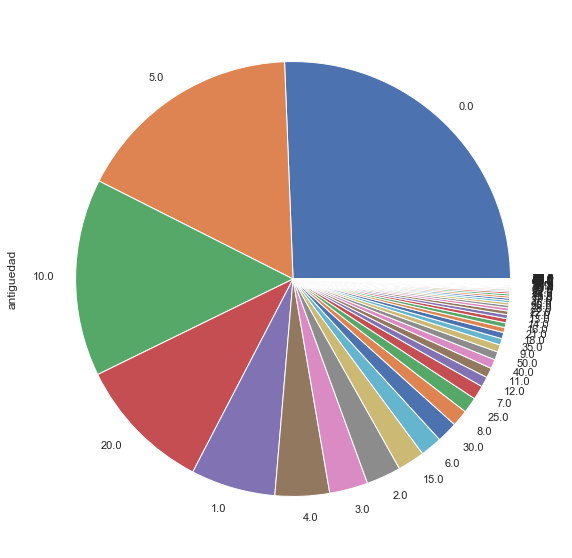

In [33]:
#Grafico de PIE
antiguedadPlot.value_counts().plot(kind='pie', figsize=(15, 10) )

# 9- Columna 'habitaciones'
Cantidad de habitaciones

In [34]:
habitaciones = df_zonap['habitaciones']
habitaciones.value_counts().sort_values( ascending= False )

3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

In [35]:
print('Cantidad de No nulos:',habitaciones.count() )
print('Cantidad de elementos unicos:',habitaciones.nunique() )
print('Cantidad de Nulos:',habitaciones.isna().sum() )
print('Cantidad total:',len(habitaciones))

Cantidad de No nulos: 217529
Cantidad de elementos unicos: 10
Cantidad de Nulos: 22471
Cantidad total: 240000


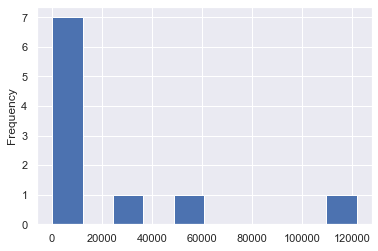

In [36]:
#Histograma
habitacionesPlot = habitaciones.dropna()
habitacionesPlot.value_counts().plot(kind='hist')

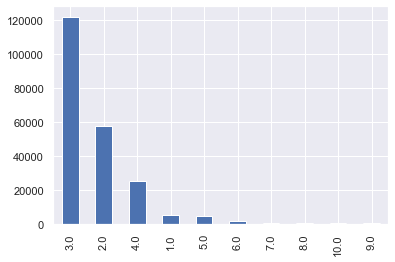

In [37]:
habitacionesPlot.value_counts().plot(kind='bar')

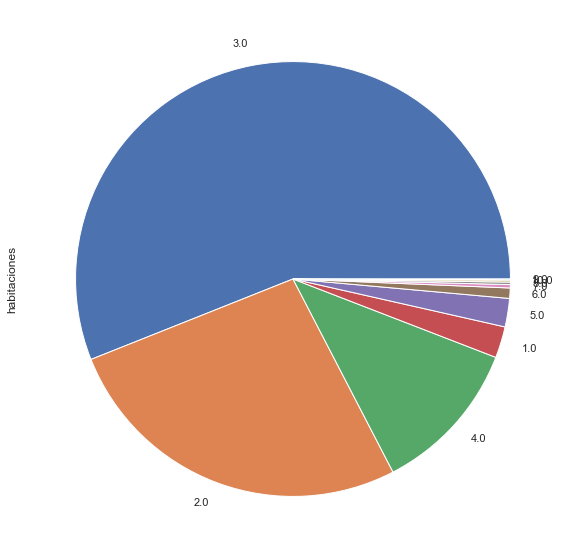

In [38]:
habitacionesPlot.value_counts().plot(kind='pie', figsize=(15, 10))

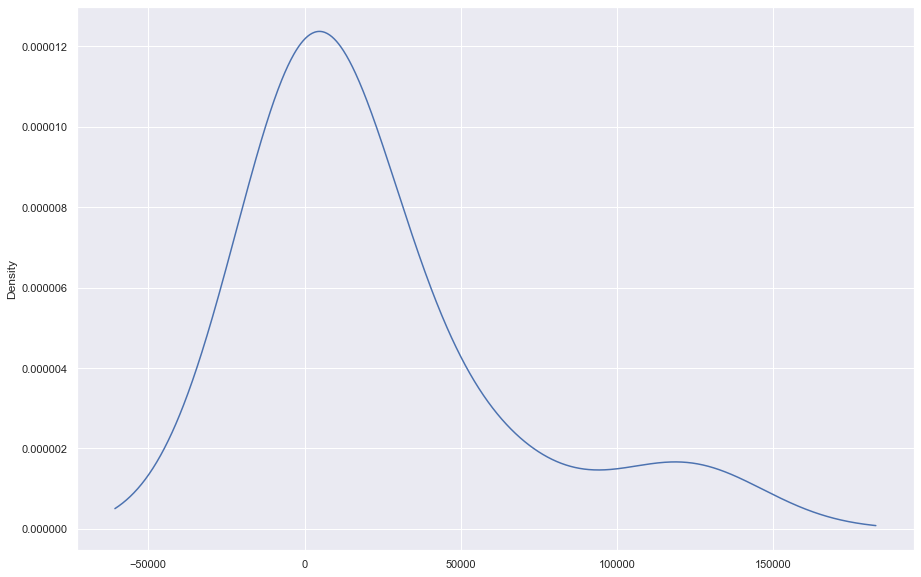

In [39]:
habitacionesPlot.value_counts().plot(kind='density', figsize=(15, 10))

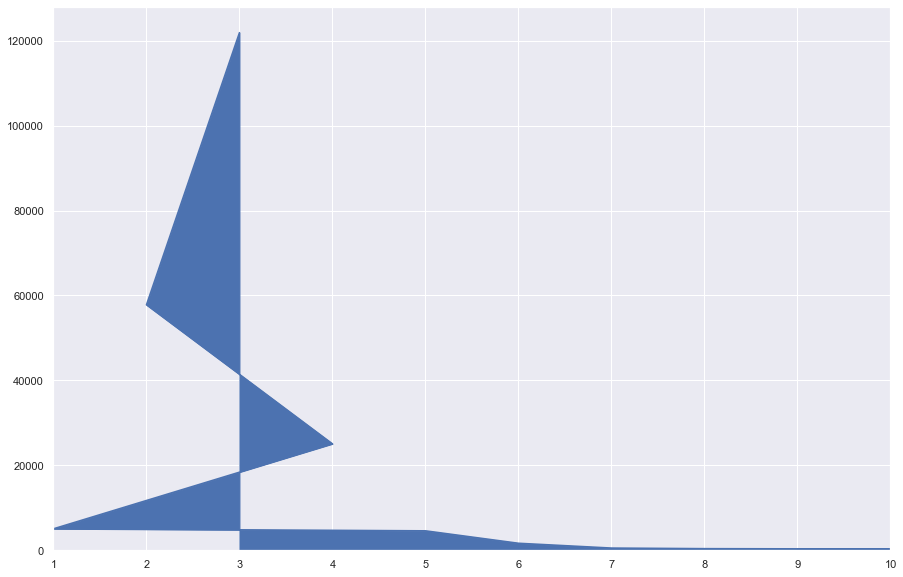

In [40]:
habitacionesPlot.value_counts().plot(kind='area', figsize=(15, 10))

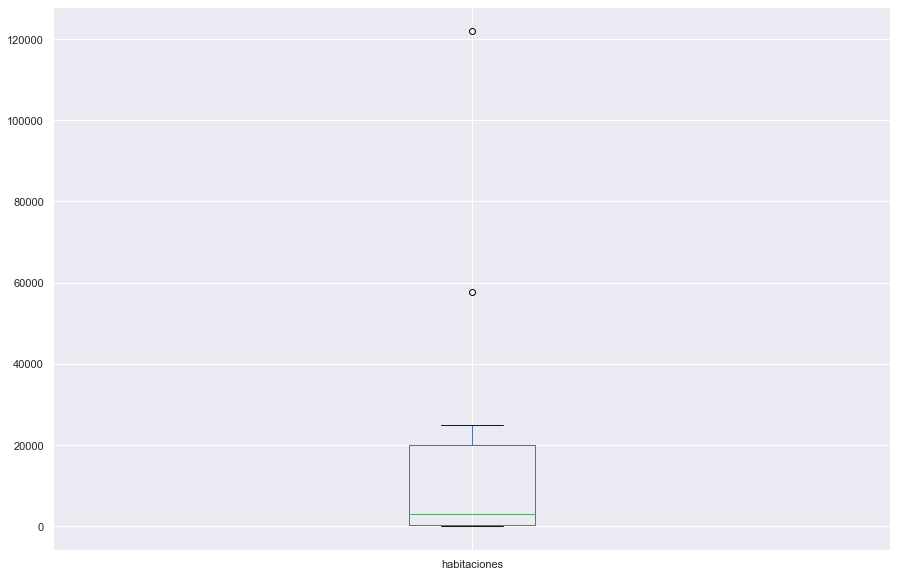

In [41]:
habitacionesPlot.value_counts().plot(kind='box', figsize=(15, 10))

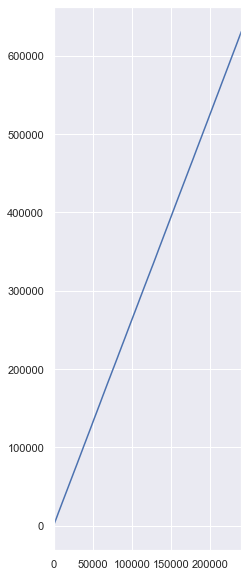

In [42]:
plt.gca().set_aspect('equal')
a = habitacionesPlot.cumsum()
a.plot( figsize=(10, 10) )

# 10- Columnas 'garages'
Cantidad de garages

In [43]:
garages = df_zonap['garages']
garages.value_counts().sort_values( ascending= False )

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [44]:
print('Cantidad de No nulos:',garages.count() )
print('Cantidad de elementos unicos:',garages.nunique() )
print('Cantidad de Nulos:',garages.isna().sum() )
print('Cantidad total:',len(garages))

Cantidad de No nulos: 202235
Cantidad de elementos unicos: 4
Cantidad de Nulos: 37765
Cantidad total: 240000


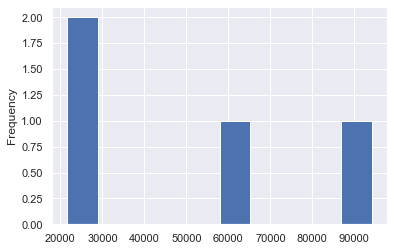

In [45]:
#Histograma
garagesPlot = garages.dropna()
garagesPlot.value_counts().plot(kind='hist')

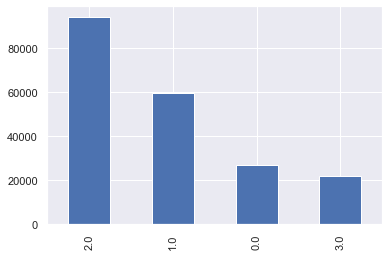

In [46]:
garagesPlot.value_counts().plot(kind='bar')

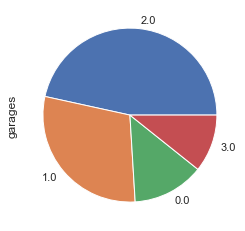

In [47]:
garagesPlot.value_counts().plot(kind='pie')

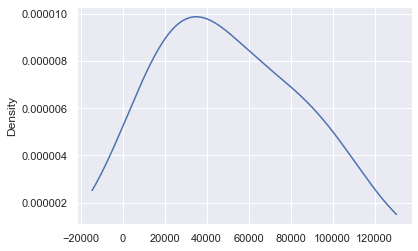

In [48]:
garagesPlot.value_counts().plot(kind='density')

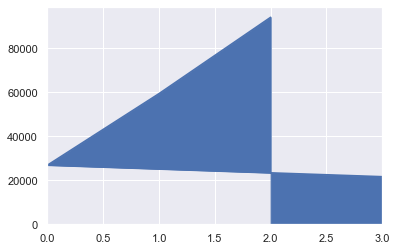

In [49]:
garagesPlot.value_counts().plot(kind='area')

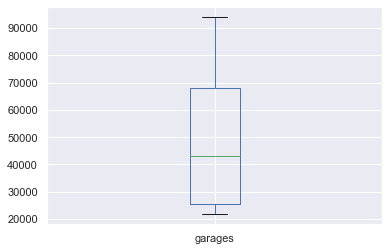

In [50]:
garagesPlot.value_counts().plot(kind='box')

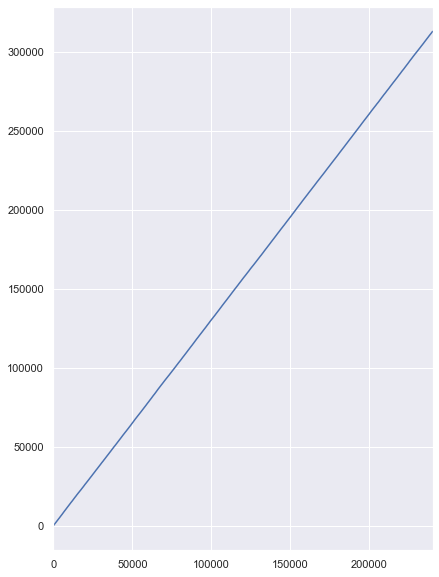

In [51]:
plt.gca().set_aspect('equal')
a = garagesPlot.cumsum()
a.plot( figsize=(10, 10) )

# 11- Columna 'lat'
Latitud

In [52]:
lat = df_zonap['lat']
lat.value_counts().sort_values( ascending= False )

0.000000     448
23.063781      8
23.054936      7
19.358000      6
19.410000      6
            ... 
19.434594      1
20.686760      1
22.119988      1
19.273097      1
19.451576      1
Name: lat, Length: 112147, dtype: int64

In [53]:
print('Cantidad de No nulos:',lat.count() )
print('Cantidad de elementos unicos:',lat.nunique() )
print('Cantidad de Nulos:',lat.isna().sum() )
print('Cantidad total:',len(lat))

Cantidad de No nulos: 116512
Cantidad de elementos unicos: 112147
Cantidad de Nulos: 123488
Cantidad total: 240000


# 12- Columna 'Ing'
Longitud

In [56]:
longitud = df_zonap['lng']
longitud.value_counts().sort_values( ascending= False )

 0.000000      449
-99.225000      12
-99.218984       9
-99.139000       8
-99.213000       8
              ... 
-103.498917      1
-98.710770       1
-98.770926       1
-99.223343       1
-100.987465      1
Name: lng, Length: 112326, dtype: int64

In [57]:
print('Cantidad de No nulos:',longitud.count() )
print('Cantidad de elementos unicos:',longitud.nunique() )
print('Cantidad de Nulos:',longitud.isna().sum() )
print('Cantidad total:',len(longitud))

Cantidad de No nulos: 116512
Cantidad de elementos unicos: 112326
Cantidad de Nulos: 123488
Cantidad total: 240000


# 13- Columna 'metrostotales'
Metros totales de la propiedad


In [58]:
metrostotales = df_zonap['metrostotales']
metrostotales.value_counts().sort_values( ascending= False )

90.0     7042
200.0    6957
160.0    6026
120.0    5687
300.0    4837
         ... 
18.0       14
21.0       14
17.0       13
23.0       10
19.0        8
Name: metrostotales, Length: 425, dtype: int64

In [59]:
print('Cantidad de No nulos:',metrostotales.count() )
print('Cantidad de elementos unicos:',metrostotales.nunique() )
print('Cantidad de Nulos:',metrostotales.isna().sum() )
print('Cantidad total:',len(metrostotales))

Cantidad de No nulos: 188533
Cantidad de elementos unicos: 425
Cantidad de Nulos: 51467
Cantidad total: 240000


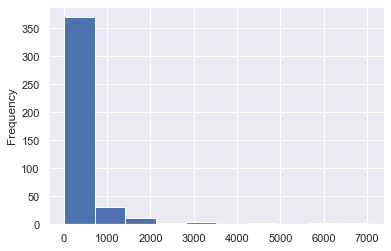

In [62]:
#Histograma
metrostotalesPlot = metrostotales.dropna()
metrostotalesPlot.value_counts().plot(kind='hist')

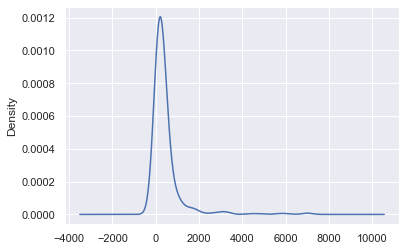

In [64]:
metrostotalesPlot.value_counts().plot(kind='density')

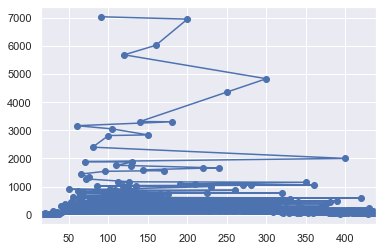

In [70]:
metrostotalesPlot.value_counts().plot(kind='line',linestyle='-', marker='o')

# 14- Columnas 'metroscubiertos' 
Metros cubiertos de la propiedad


In [71]:
metroscubiertos = df_zonap['metroscubiertos']
metroscubiertos.value_counts().sort_values( ascending= False )

200.0    4984
120.0    4290
60.0     4217
90.0     4204
300.0    3920
         ... 
18.0       13
22.0       12
19.0       10
21.0        9
17.0        8
Name: metroscubiertos, Length: 425, dtype: int64

In [72]:
print('Cantidad de No nulos:',metroscubiertos.count() )
print('Cantidad de elementos unicos:',metroscubiertos.nunique() )
print('Cantidad de Nulos:',metroscubiertos.isna().sum() )
print('Cantidad total:',len(metroscubiertos))

Cantidad de No nulos: 222600
Cantidad de elementos unicos: 425
Cantidad de Nulos: 17400
Cantidad total: 240000


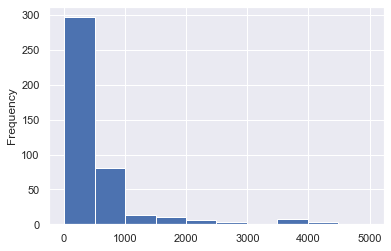

In [73]:
#Histograma
metroscubiertosPlot = metroscubiertos.dropna()
metroscubiertosPlot.value_counts().plot(kind='hist')

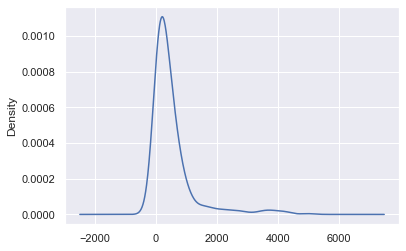

In [75]:
metroscubiertosPlot.value_counts().plot(kind='density')

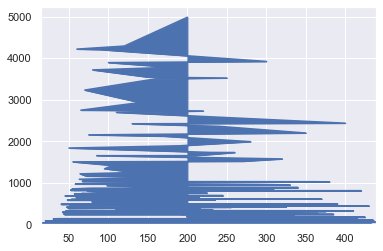

In [76]:
metroscubiertosPlot.value_counts().plot(kind='area')

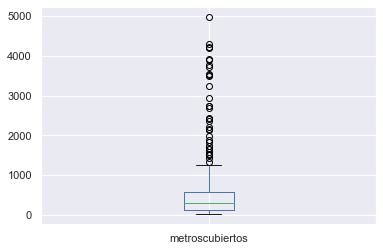

In [77]:
metroscubiertosPlot.value_counts().plot(kind='box')

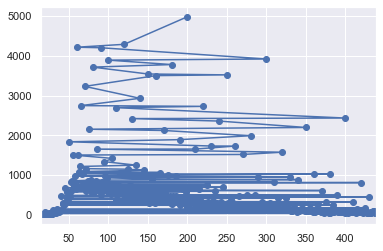

In [79]:
metroscubiertosPlot.value_counts().plot(kind='line',linestyle='-', marker='o')

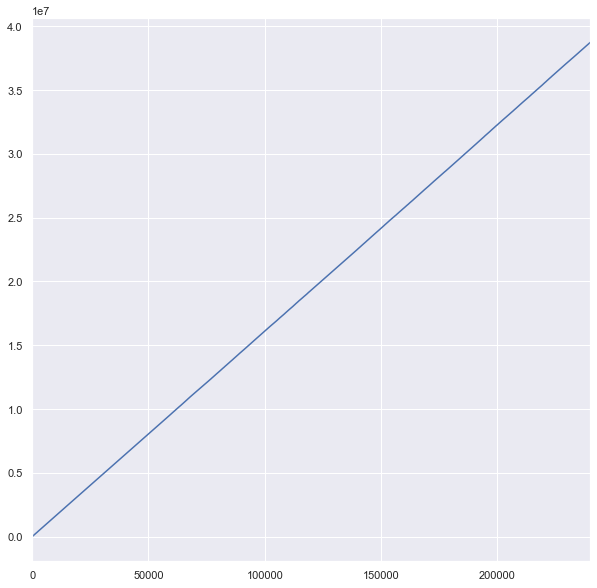

In [81]:
#plt.gca().set_aspect('equal')
a = metroscubiertosPlot.cumsum()
a.plot( figsize=(10, 10) )

# 15- Columna 'banos'
Cantidad de baños

In [82]:
banos = df_zonap['banos']
banos.value_counts().sort_values( ascending= False )

2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [83]:
print('Cantidad de No nulos:',banos.count() )
print('Cantidad de elementos unicos:',banos.nunique() )
print('Cantidad de Nulos:',banos.isna().sum() )
print('Cantidad total:',len(banos))

Cantidad de No nulos: 213779
Cantidad de elementos unicos: 4
Cantidad de Nulos: 26221
Cantidad total: 240000


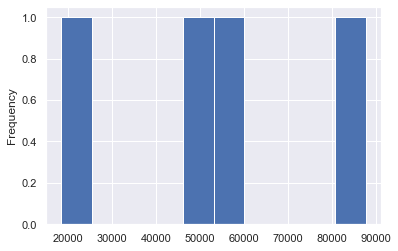

In [84]:
#Histograma
banosPlot = banos.dropna()
banosPlot.value_counts().plot(kind='hist')

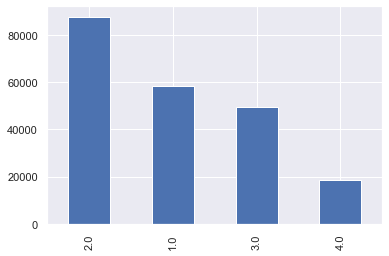

In [85]:
banosPlot.value_counts().plot(kind='bar')

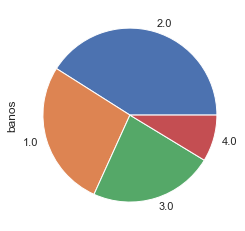

In [86]:
banosPlot.value_counts().plot(kind='pie')

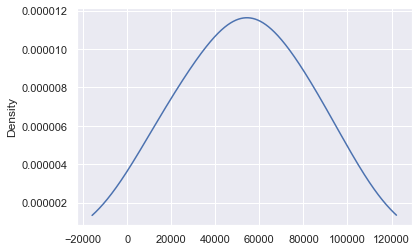

In [87]:
banosPlot.value_counts().plot(kind='density')

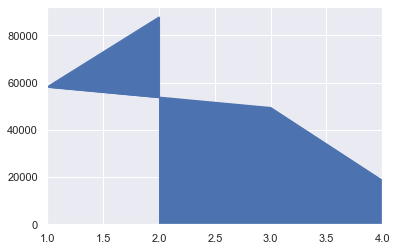

In [88]:
banosPlot.value_counts().plot(kind='area')

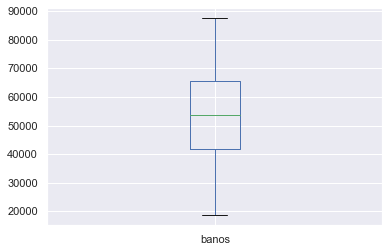

In [90]:
banosPlot.value_counts().plot(kind='box')

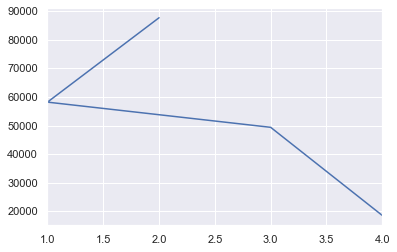

In [91]:
banosPlot.value_counts().plot(kind='line')

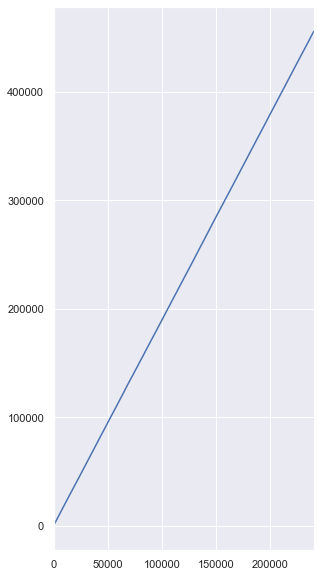

In [93]:
plt.gca().set_aspect('equal')
a = banosPlot.cumsum()
a.plot( figsize=(10, 10) )

# 16- Columnas 'fecha'
Fecha de publicación


In [94]:
fecha = df_zonap['fecha']
fecha.value_counts().sort_values( ascending= False )

2016-12-03 00:00:00    1416
2016-04-08 00:00:00    1337
2016-12-28 00:00:00    1182
2012-08-17 00:00:00    1168
2016-12-27 00:00:00    1167
                       ... 
2012-12-24 00:00:00      11
2013-02-10 00:00:00       9
2012-12-30 00:00:00       5
2014-09-30 18:12:16       2
2014-08-31 18:12:16       1
Name: fecha, Length: 1830, dtype: int64

In [95]:
print('Cantidad de No nulos:',fecha.count() )
print('Cantidad de elementos unicos:',fecha.nunique() )
print('Cantidad de Nulos:',fecha.isna().sum() )
print('Cantidad total:',len(fecha))

Cantidad de No nulos: 240000
Cantidad de elementos unicos: 1830
Cantidad de Nulos: 0
Cantidad total: 240000


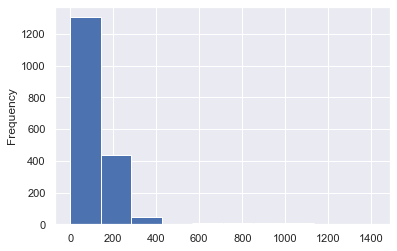

In [98]:
#Histograma
fechasPlot = fecha.dropna()
fechasPlot.value_counts().plot(kind='hist')

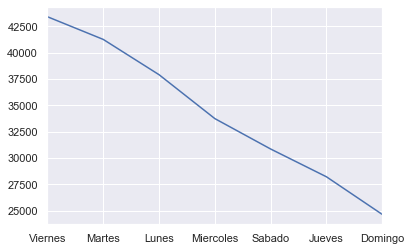

In [106]:
#Por Dias de la semana
fechasDias = fechasPlot.dt.dayofweek
fechasDias.replace(0,'Lunes', inplace=True)
fechasDias.replace(1,'Martes', inplace=True)
fechasDias.replace(2,'Miercoles', inplace=True)
fechasDias.replace(3,'Jueves', inplace=True)
fechasDias.replace(4,'Viernes', inplace=True)
fechasDias.replace(5,'Sabado', inplace=True)
fechasDias.replace(6,'Domingo', inplace=True)

fechasDias.value_counts().plot()


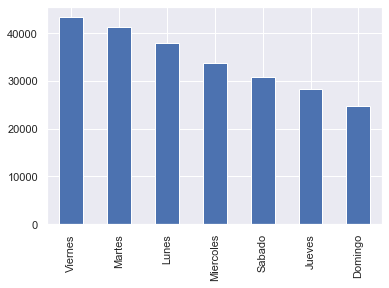

In [108]:
fechasDias.value_counts().plot( kind = 'bar')

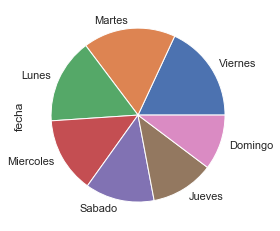

In [110]:
fechasDias.value_counts().plot( kind = 'pie')

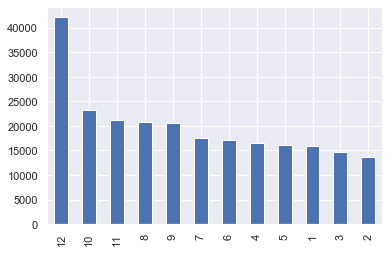

In [122]:
#Por meses
fecha.dt.month.value_counts().plot(kind='bar')

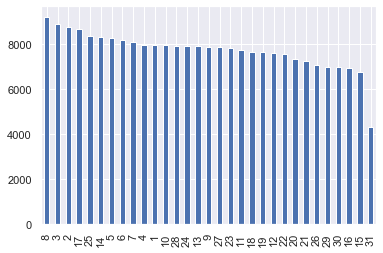

In [124]:
#Dias al Mes
fecha.dt.day.value_counts().plot(kind='bar')

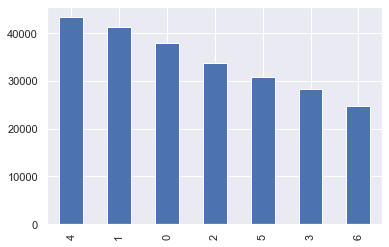

In [125]:
#Dias de la semana
fecha.dt.dayofweek.value_counts().plot(kind='bar')

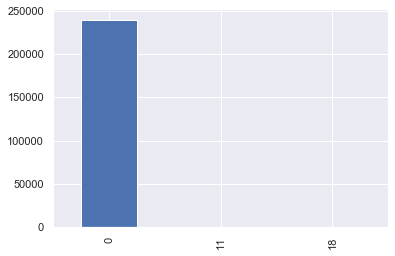

In [128]:
#Hora del dia
fecha.dt.hour.value_counts().plot(kind='bar')

In [140]:
#Horas del dia  ( Son puntuales )
print('Candidad de horas distintas :',fecha.dt.hour.nunique())
fecha.dt.hour.value_counts()

Candidad de horas distintas : 3


0     239986
11        11
18         3
Name: fecha, dtype: int64

# 17-Columna 'gimnasio'
Si el edificio o la propiedad tiene un gimnasio

In [144]:
gimnasio = df_zonap['gimnasio']
gimnasio.value_counts().sort_values( ascending= False )

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [145]:
print('Cantidad de No nulos:',gimnasio.count() )
print('Cantidad de elementos unicos:',gimnasio.nunique() )
print('Cantidad de Nulos:',gimnasio.isna().sum() )
print('Cantidad total:',len(gimnasio))

Cantidad de No nulos: 240000
Cantidad de elementos unicos: 2
Cantidad de Nulos: 0
Cantidad total: 240000


0.0    225006
1.0     14994
Name: gimnasio, dtype: int64


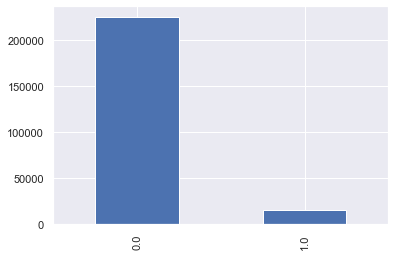

In [149]:
#Histograma
gimnasioPlot = gimnasio.dropna()
print(gimnasioPlot.value_counts() )
gimnasioPlot.value_counts().plot(kind='bar')

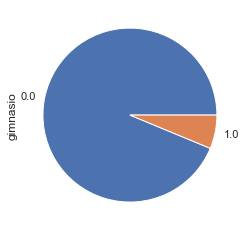

In [150]:
gimnasioPlot.value_counts().plot(kind='pie')

# 18 - Columna 'usosmultiples'
Si el edificio o la propiedad tiene un SUM


In [151]:
usosmultiples = df_zonap['usosmultiples']
usosmultiples.value_counts().sort_values( ascending= False )

0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [152]:
print('Cantidad de No nulos:',usosmultiples.count() )
print('Cantidad de elementos unicos:',usosmultiples.nunique() )
print('Cantidad de Nulos:',usosmultiples.isna().sum() )
print('Cantidad total:',len(usosmultiples))

Cantidad de No nulos: 240000
Cantidad de elementos unicos: 2
Cantidad de Nulos: 0
Cantidad total: 240000


0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64


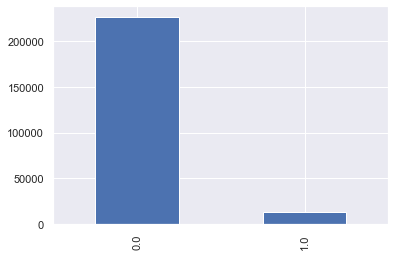

In [157]:
#Histograma
usosmultiplesPlot = usosmultiples.dropna()
print(usosmultiplesPlot.value_counts() )
usosmultiplesPlot.value_counts().plot(kind='bar')

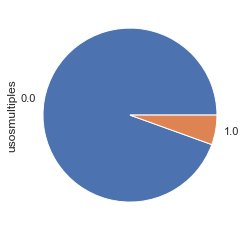

In [154]:
usosmultiplesPlot.value_counts().plot(kind='pie')

# 19 - Columna 'piscina'
Si el edificio o la propiedad tiene un piscina


In [155]:
piscina = df_zonap['piscina']
piscina.value_counts().sort_values( ascending= False )

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [158]:
print('Cantidad de No nulos:',piscina.count() )
print('Cantidad de elementos unicos:',piscina.nunique() )
print('Cantidad de Nulos:',piscina.isna().sum() )
print('Cantidad total:',len(piscina))

Cantidad de No nulos: 240000
Cantidad de elementos unicos: 2
Cantidad de Nulos: 0
Cantidad total: 240000


0.0    219028
1.0     20972
Name: piscina, dtype: int64


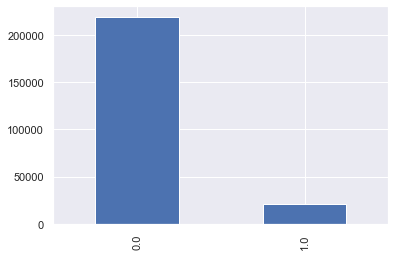

In [159]:
#Histograma
piscinaPlot = piscina.dropna()
print(piscinaPlot.value_counts() )
piscinaPlot.value_counts().plot(kind='bar')

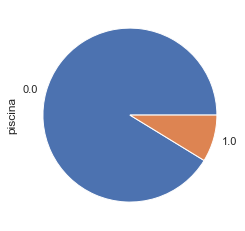

In [160]:
piscinaPlot.value_counts().plot(kind='pie')

# 20- Columna 'escuelascercanas'
Si la propiedad tiene escuelas cerca

In [161]:
escuelascercanas = df_zonap['escuelascercanas']
escuelascercanas.value_counts().sort_values( ascending= False )

0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [162]:
print('Cantidad de No nulos:',escuelascercanas.count() )
print('Cantidad de elementos unicos:',escuelascercanas.nunique() )
print('Cantidad de Nulos:',escuelascercanas.isna().sum() )
print('Cantidad total:',len(escuelascercanas))

Cantidad de No nulos: 240000
Cantidad de elementos unicos: 2
Cantidad de Nulos: 0
Cantidad total: 240000


0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64


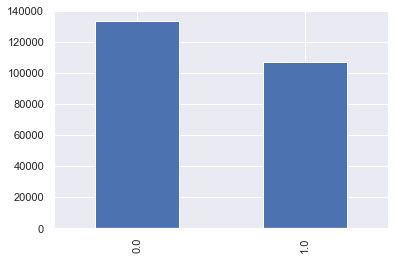

In [163]:
#Histograma
escuelascercanasPlot = escuelascercanas.dropna()
print(escuelascercanasPlot.value_counts() )
escuelascercanasPlot.value_counts().plot(kind='bar')

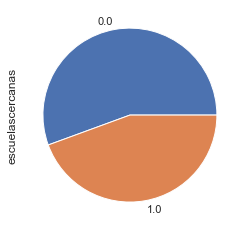

In [164]:
escuelascercanasPlot.value_counts().plot(kind='pie')

# 21- Columnas 'centroscomercialescercanos'
Si la propiedad tiene centros comerciales cerca

In [165]:
centroscomercialescercanos = df_zonap['centroscomercialescercanos']
centroscomercialescercanos.value_counts().sort_values( ascending= False )

0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [166]:
print('Cantidad de No nulos:',centroscomercialescercanos.count() )
print('Cantidad de elementos unicos:',centroscomercialescercanos.nunique() )
print('Cantidad de Nulos:',centroscomercialescercanos.isna().sum() )
print('Cantidad total:',len(centroscomercialescercanos))

Cantidad de No nulos: 240000
Cantidad de elementos unicos: 2
Cantidad de Nulos: 0
Cantidad total: 240000


0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64


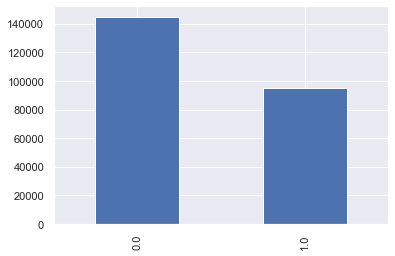

In [167]:
#Histograma
centroscomercialescercanosPlot = centroscomercialescercanos.dropna()
print(centroscomercialescercanosPlot.value_counts() )
centroscomercialescercanosPlot.value_counts().plot(kind='bar')

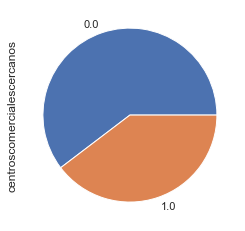

In [168]:
centroscomercialescercanosPlot.value_counts().plot(kind='pie')

# 22- Columnas 'precio'
Valor de publicación de la propiedad en pesos mexicanos


In [169]:
precio = df_zonap['precio']
precio.value_counts().sort_values( ascending= False )

1500000.0    3041
2500000.0    3036
1200000.0    2909
3500000.0    2726
1300000.0    2480
             ... 
2825050.0       1
2819804.0       1
438750.0        1
1936902.0       1
1081628.0       1
Name: precio, Length: 15520, dtype: int64

In [170]:
print('Cantidad de No nulos:',precio.count() )
print('Cantidad de elementos unicos:',precio.nunique() )
print('Cantidad de Nulos:',precio.isna().sum() )
print('Cantidad total:',len(precio))

Cantidad de No nulos: 240000
Cantidad de elementos unicos: 15520
Cantidad de Nulos: 0
Cantidad total: 240000


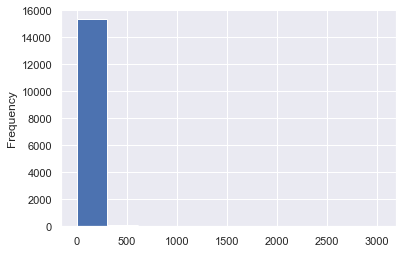

In [172]:
#Histograma
precioPlot = precio.dropna()
precioPlot.value_counts().plot(kind='hist')

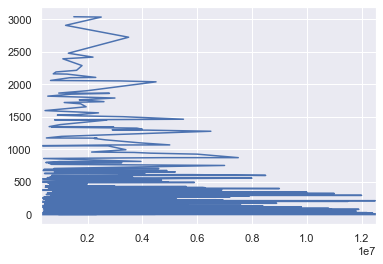

In [175]:
precioPlot.value_counts().plot(kind='line')

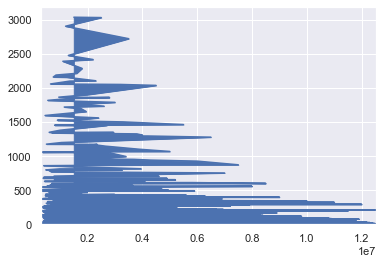

In [176]:
precioPlot.value_counts().plot(kind='area')

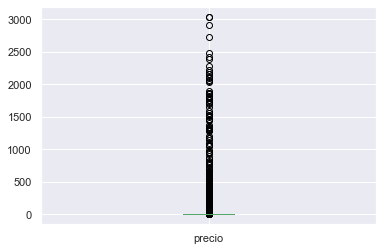

In [177]:
precioPlot.value_counts().plot(kind='box')

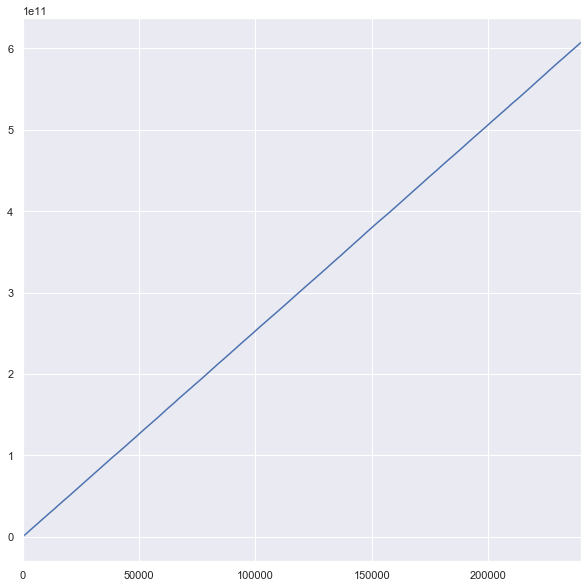

In [179]:
a = precioPlot.cumsum()
a.plot( figsize=(10, 10) )